# Importing Lib

In [2]:
#importing imp Lib for Project

import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import metrics

Importing Data

In [4]:
data = pd.read_csv('Data.csv')
data

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,...,1,142,34.0,2005.0,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,...,1,130,28.0,2012.0,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,...,1,147,NaN,NaN,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,...,1,60,25.0,NaN,18,0,A,6,30,25093


# Analysis of Dataset

In [5]:
data.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,2009.383185,17.130440,0.303280,3.482040,18.812280,22102.632920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.872534,7.528230,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


# Exploratory Data Analysis

<AxesSubplot:>

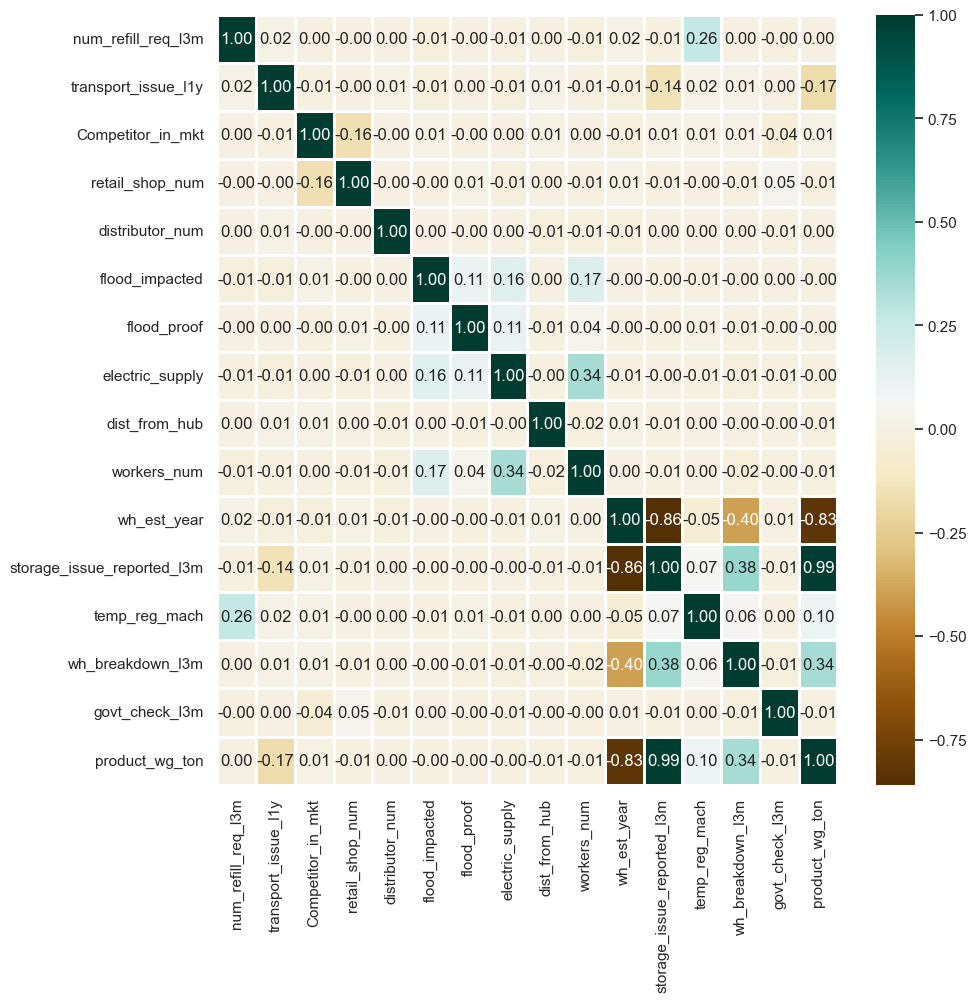

In [6]:
#correlation in data
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap ='BrBG',fmt ='.2f',linewidth = 2 , annot = True)

array([[<AxesSubplot:title={'center':'num_refill_req_l3m'}>]],
      dtype=object)

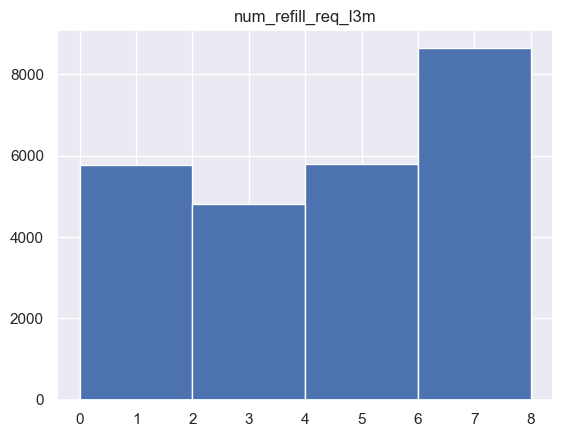

In [7]:
data.hist(column=['num_refill_req_l3m'],bins=4)

array([[<AxesSubplot:title={'center':'retail_shop_num'}>]], dtype=object)

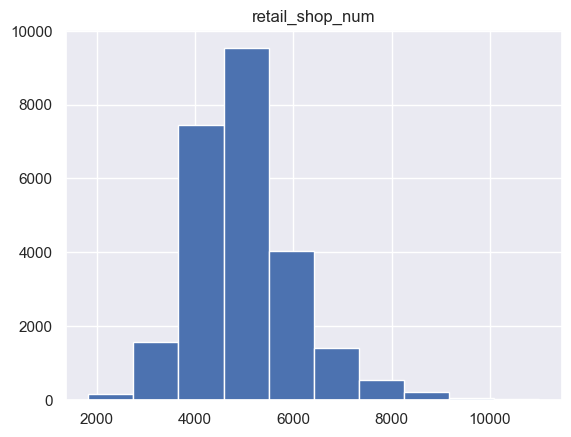

In [8]:
data.hist(column=['retail_shop_num'],bins=10)

array([[<AxesSubplot:title={'center':'Competitor_in_mkt'}>]], dtype=object)

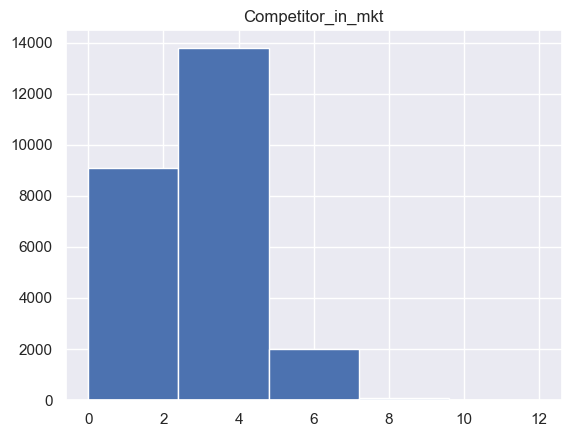

In [9]:
data.hist(column=['Competitor_in_mkt'],bins=5)

array([[<AxesSubplot:title={'center':'distributor_num'}>]], dtype=object)

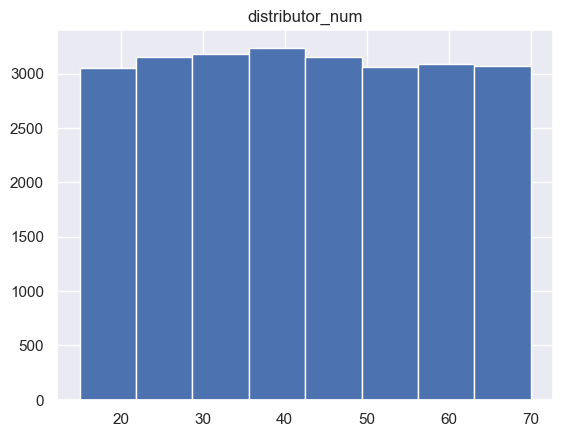

In [10]:
data.hist(column=['distributor_num'],bins=8)

array([[<AxesSubplot:title={'center':'workers_num'}>]], dtype=object)

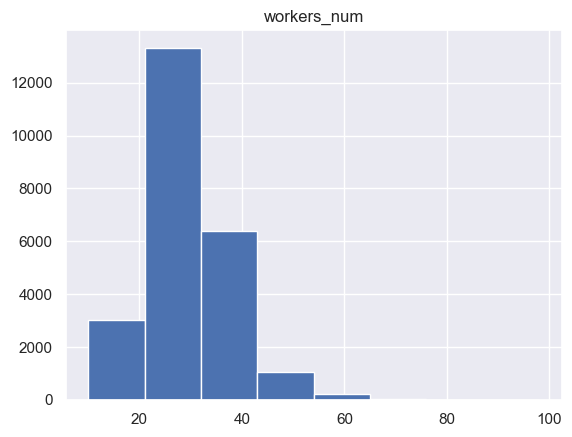

In [11]:
data.hist(column=['workers_num'],bins=8)

array([[<AxesSubplot:title={'center':'storage_issue_reported_l3m'}>]],
      dtype=object)

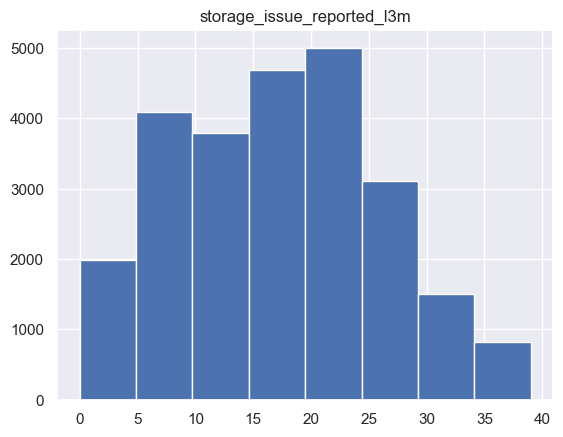

In [12]:
data.hist(column=['storage_issue_reported_l3m'],bins=8)

array([[<AxesSubplot:title={'center':'wh_breakdown_l3m'}>]], dtype=object)

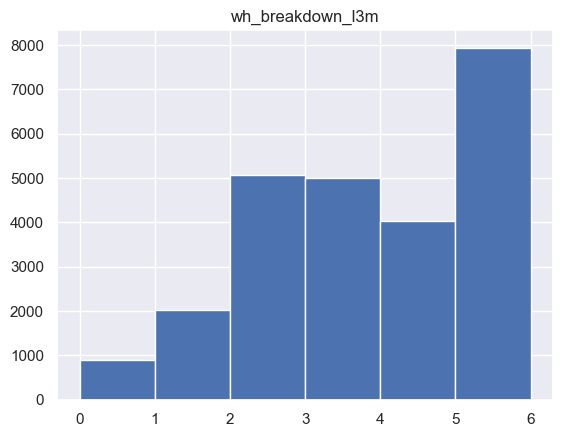

In [13]:
data.hist(column=['wh_breakdown_l3m'],bins=6)

array([[<AxesSubplot:title={'center':'govt_check_l3m'}>]], dtype=object)

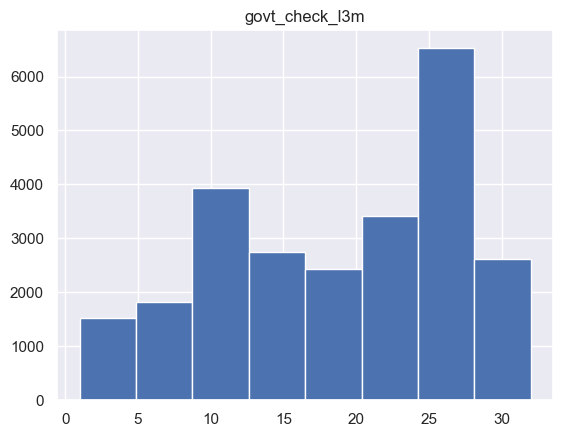

In [14]:
data.hist(column=['govt_check_l3m'],bins=8)

array([[<AxesSubplot:title={'center':'transport_issue_l1y'}>]],
      dtype=object)

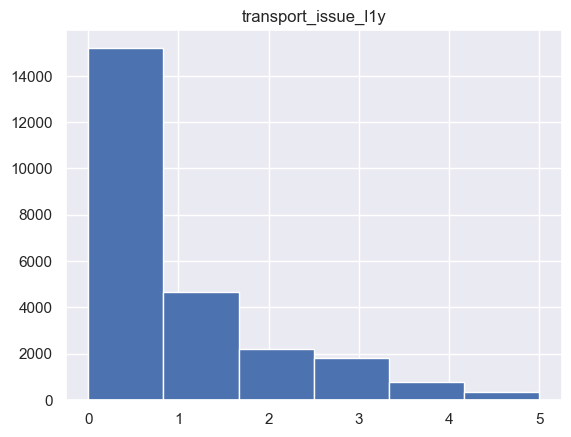

In [15]:
data.hist(column=['transport_issue_l1y'],bins=6)

array([[<AxesSubplot:title={'center':'dist_from_hub'}>]], dtype=object)

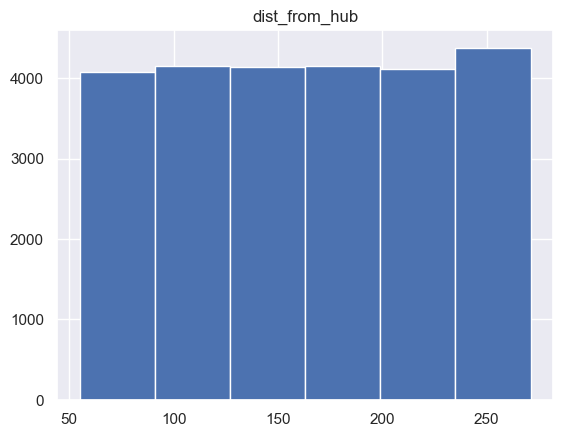

In [16]:
data.hist(column=['dist_from_hub'],bins=6)

catagorical variable

<AxesSubplot:xlabel='Location_type', ylabel='count'>

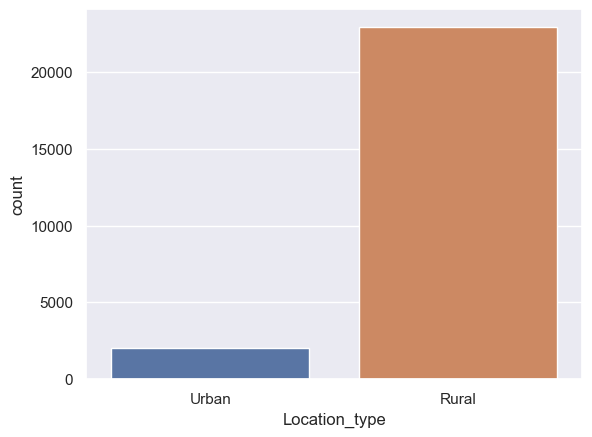

In [17]:
sns.countplot(data = data, x = 'Location_type')

<AxesSubplot:xlabel='WH_capacity_size', ylabel='count'>

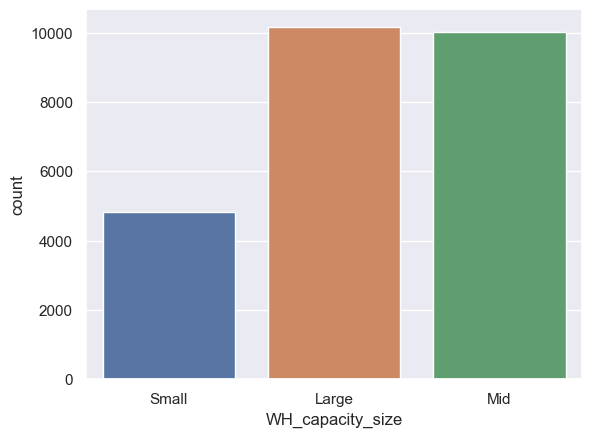

In [18]:
sns.countplot(data = data, x = 'WH_capacity_size')

<AxesSubplot:xlabel='wh_owner_type', ylabel='count'>

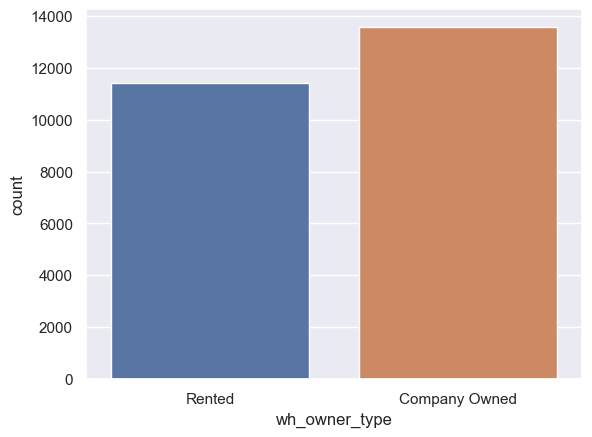

In [19]:
sns.countplot(data = data, x = 'wh_owner_type')

<AxesSubplot:xlabel='zone', ylabel='count'>

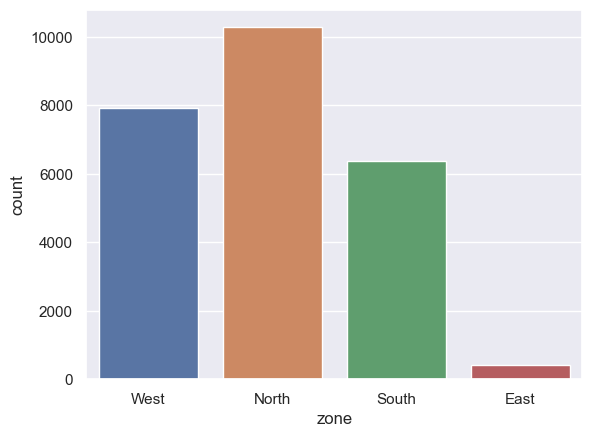

In [20]:
sns.countplot(data = data, x = 'zone')

<AxesSubplot:xlabel='WH_regional_zone', ylabel='count'>

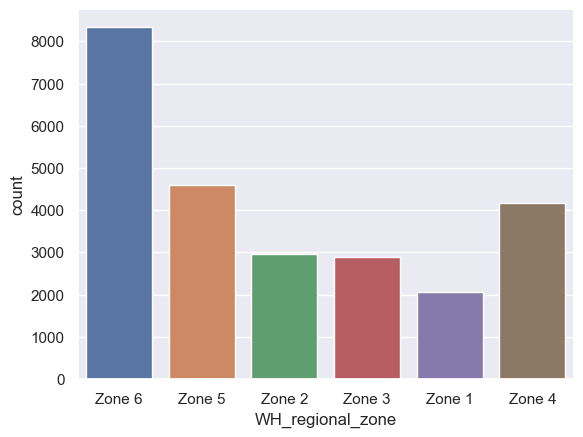

In [21]:
sns.countplot(data = data, x = 'WH_regional_zone')

<AxesSubplot:xlabel='flood_impacted', ylabel='count'>

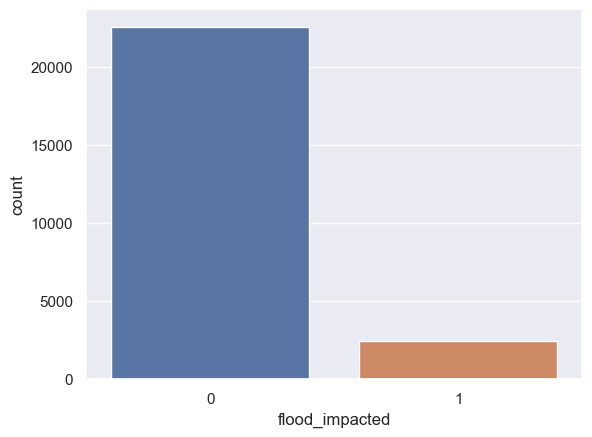

In [22]:
sns.countplot(data = data, x = 'flood_impacted')

<AxesSubplot:xlabel='flood_proof', ylabel='count'>

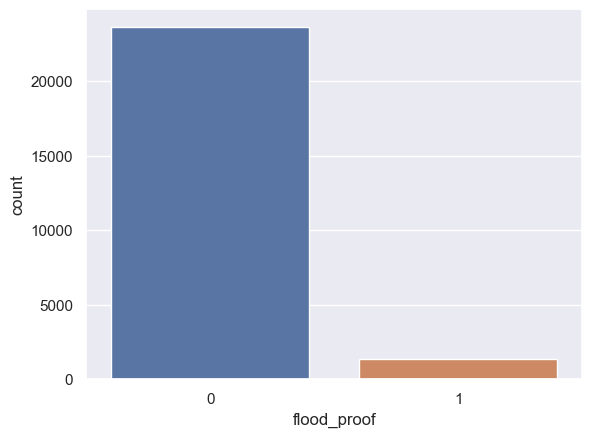

In [23]:
sns.countplot(data = data, x = 'flood_proof')

<AxesSubplot:xlabel='electric_supply', ylabel='count'>

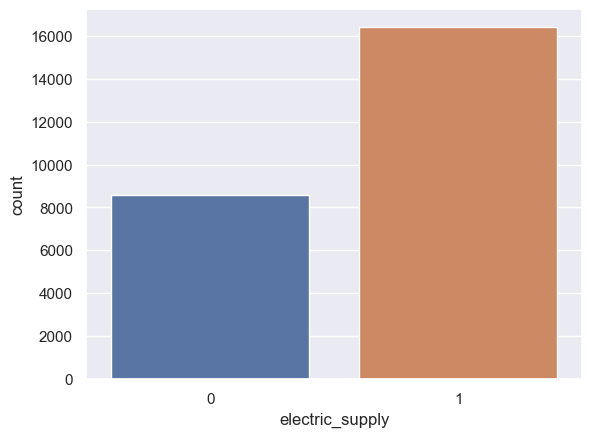

In [24]:
sns.countplot(data = data, x = 'electric_supply')

<AxesSubplot:xlabel='temp_reg_mach', ylabel='count'>

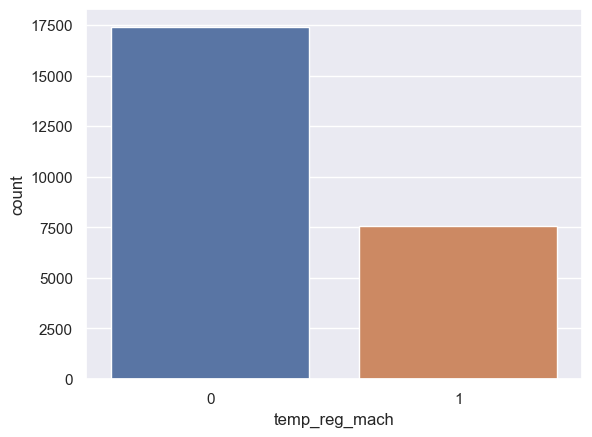

In [25]:
sns.countplot(data = data, x = 'temp_reg_mach')

<AxesSubplot:xlabel='approved_wh_govt_certificate', ylabel='count'>

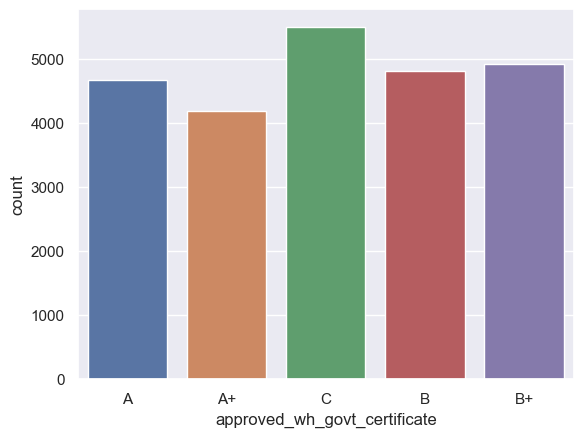

In [26]:
sns.countplot(data = data, x = 'approved_wh_govt_certificate')

Bivariate/Multivariate Analysis

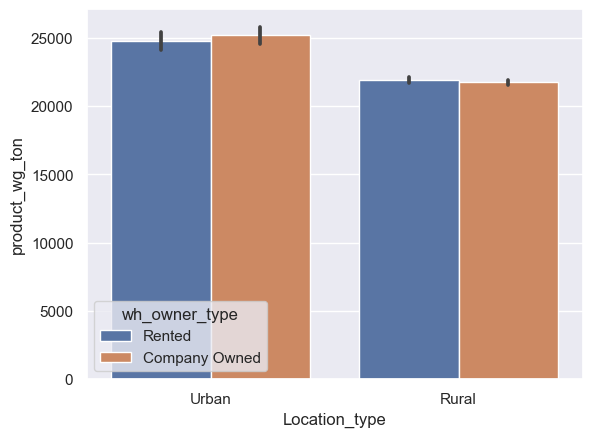

In [27]:
#Product Demand vs Ownership and Location Type
sns.barplot(data['Location_type'],data['product_wg_ton'],hue=data['wh_owner_type'])
plt.show()

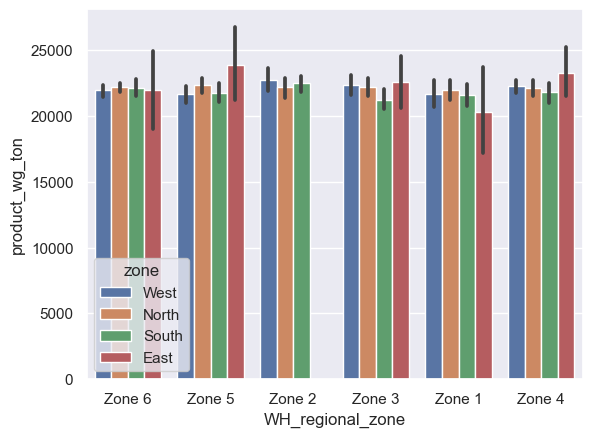

In [28]:
#Distribution of product demands(averages) across geography
sns.barplot(data['WH_regional_zone'],data['product_wg_ton'],hue=data['zone'])
plt.show()

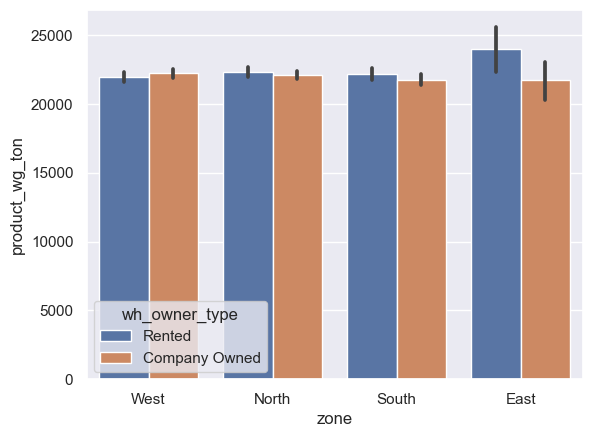

In [29]:
#Transport Issues across Zones and Ownership
sns.barplot(data['zone'],data['product_wg_ton'],hue=data['wh_owner_type'])
plt.show()

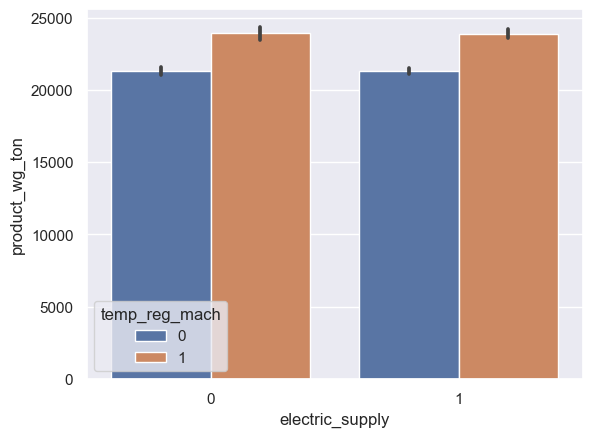

In [30]:
#Warehouse Electricity and Temperature Regulation
sns.barplot(data['electric_supply'],data['product_wg_ton'],hue=data['temp_reg_mach'])
plt.show()

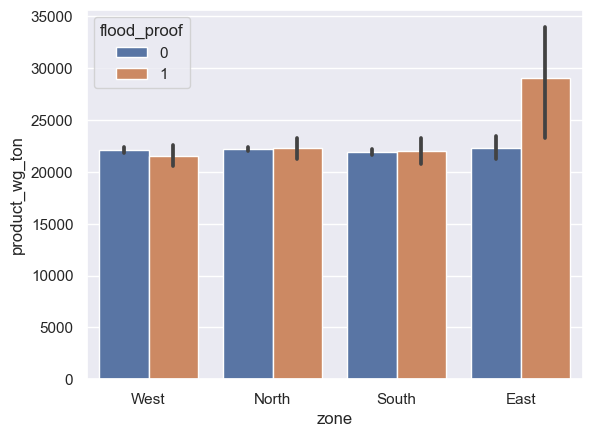

In [31]:
#Flood Proofing across Zones
sns.barplot(data['zone'],data['product_wg_ton'],hue=data['flood_proof'])
plt.show()

<AxesSubplot:xlabel='approved_wh_govt_certificate', ylabel='count'>

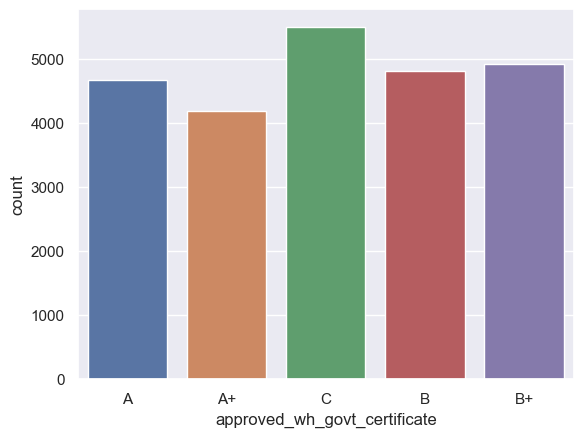

In [32]:
#Product Demand vs Certifications
sns.countplot(data = data, x = 'approved_wh_govt_certificate')

In [33]:
obj= (data.dtypes == "object")
object_cols = list(obj[obj].index)
print("Categorical Variables:",len(object_cols))

int_= (data.dtypes == "int64")
int_cols = list(int_[int_].index)
print("Integer Variables:",len(int_cols))

fo= (data.dtypes == "float")
fo_cols = list(fo[fo].index)
print("Float Variables:",len(fo_cols))

Categorical Variables: 8
Integer Variables: 14
Float Variables: 2


In [34]:
#finding Null Value
data.isnull().sum()/len(data)*100

Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

In [35]:
dataset = data.drop(['wh_est_year','WH_Manager_ID','Ware_house_ID','approved_wh_govt_certificate'], axis=1, inplace = True)

In [36]:
data['workers_num'] = data['workers_num'].fillna(data['workers_num'].median())

In [37]:
#finding Null Value
data.isnull().sum()/len(data)*100

Location_type                 0.0
WH_capacity_size              0.0
zone                          0.0
WH_regional_zone              0.0
num_refill_req_l3m            0.0
transport_issue_l1y           0.0
Competitor_in_mkt             0.0
retail_shop_num               0.0
wh_owner_type                 0.0
distributor_num               0.0
flood_impacted                0.0
flood_proof                   0.0
electric_supply               0.0
dist_from_hub                 0.0
workers_num                   0.0
storage_issue_reported_l3m    0.0
temp_reg_mach                 0.0
wh_breakdown_l3m              0.0
govt_check_l3m                0.0
product_wg_ton                0.0
dtype: float64

In [38]:
df = pd.concat([data,pd.get_dummies(data['WH_capacity_size'], prefix='WH_capacity_size')], axis=1).drop(['WH_capacity_size'],axis=1)
df = pd.concat([df,pd.get_dummies(data['zone'], prefix='zone')], axis=1).drop(['zone'],axis=1)
df = pd.concat([df,pd.get_dummies(data['WH_regional_zone'], prefix='WH_regional_zone')], axis=1).drop(['WH_regional_zone'],axis=1)
df = pd.concat([df,pd.get_dummies(data['Location_type'], prefix='Location_type')], axis=1).drop(['Location_type'],axis=1)
df = pd.concat([df,pd.get_dummies(data['wh_owner_type'], prefix='wh_owner_type')], axis=1).drop(['wh_owner_type'],axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   num_refill_req_l3m           25000 non-null  int64  
 1   transport_issue_l1y          25000 non-null  int64  
 2   Competitor_in_mkt            25000 non-null  int64  
 3   retail_shop_num              25000 non-null  int64  
 4   distributor_num              25000 non-null  int64  
 5   flood_impacted               25000 non-null  int64  
 6   flood_proof                  25000 non-null  int64  
 7   electric_supply              25000 non-null  int64  
 8   dist_from_hub                25000 non-null  int64  
 9   workers_num                  25000 non-null  float64
 10  storage_issue_reported_l3m   25000 non-null  int64  
 11  temp_reg_mach                25000 non-null  int64  
 12  wh_breakdown_l3m             25000 non-null  int64  
 13  govt_check_l3m  

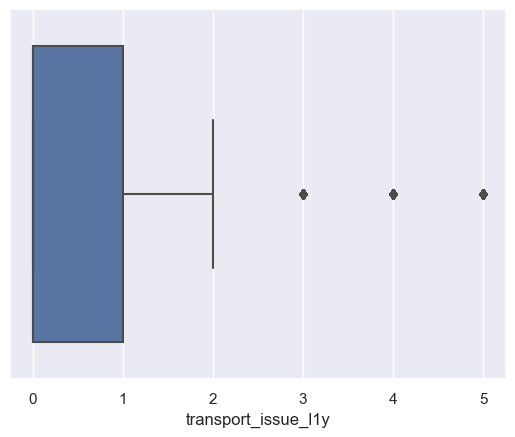

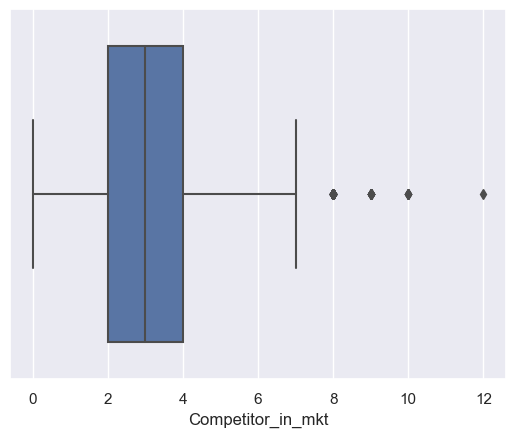

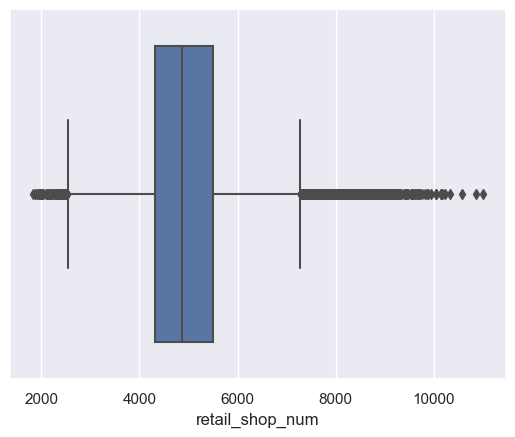

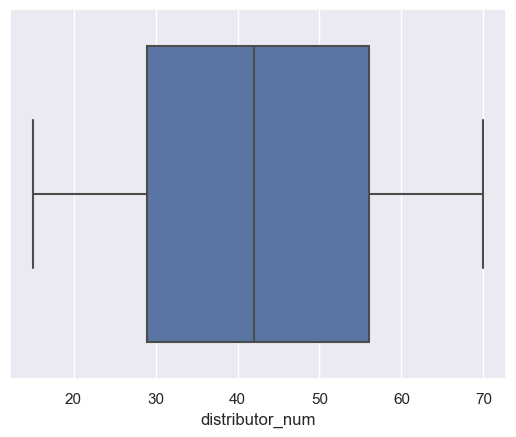

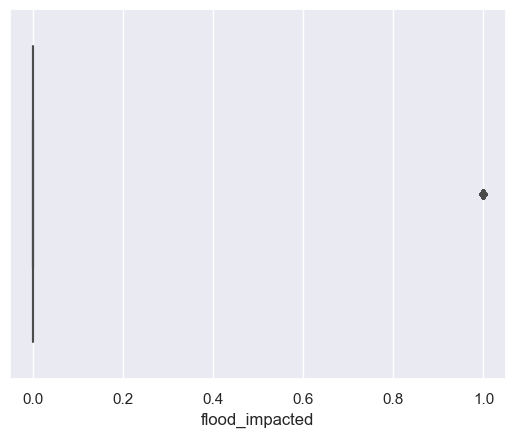

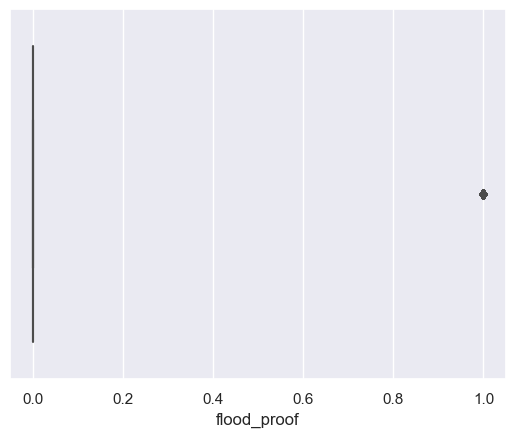

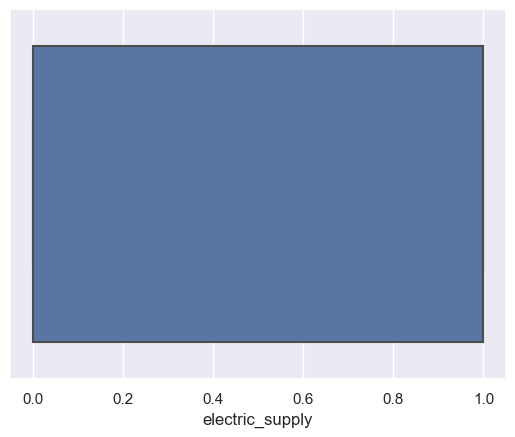

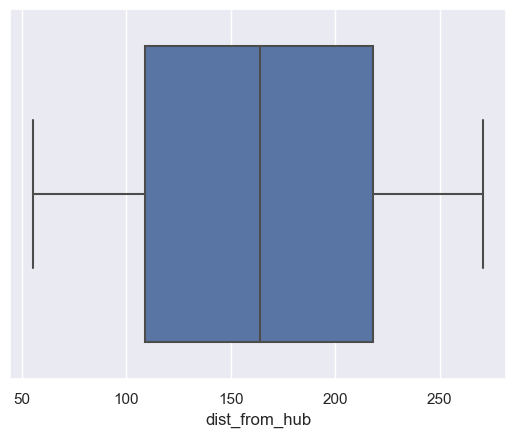

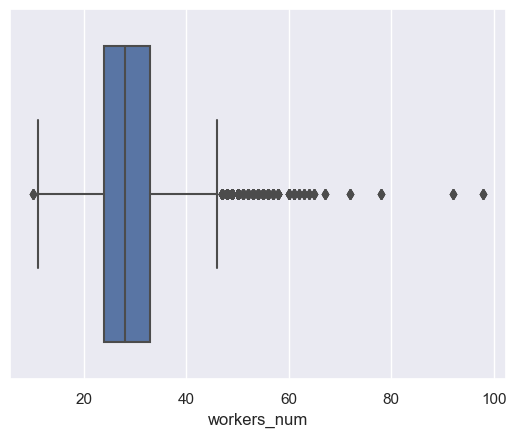

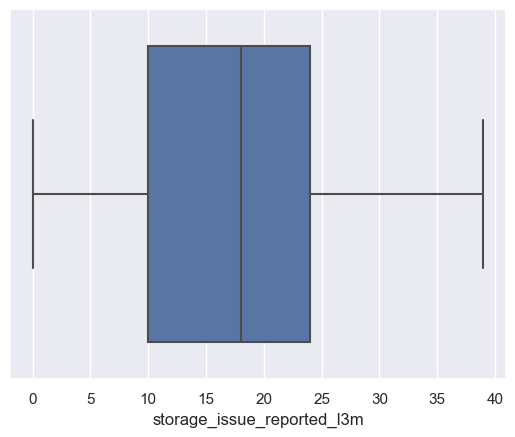

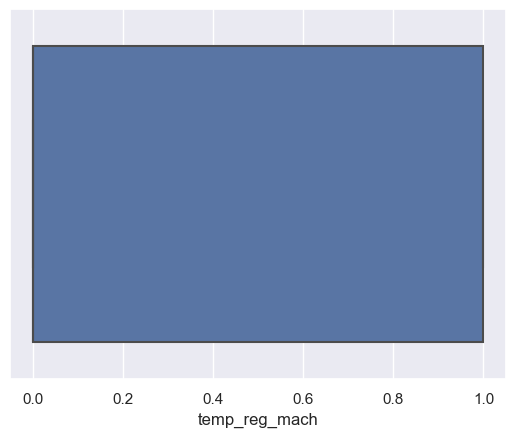

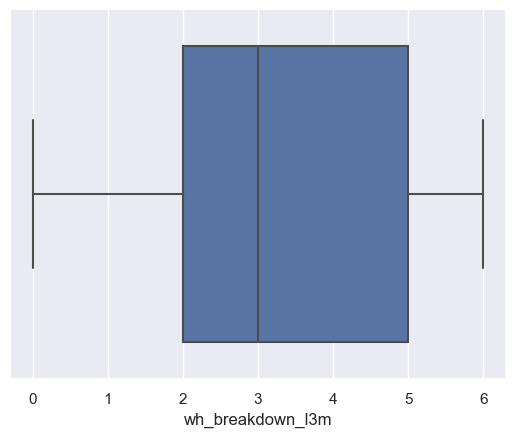

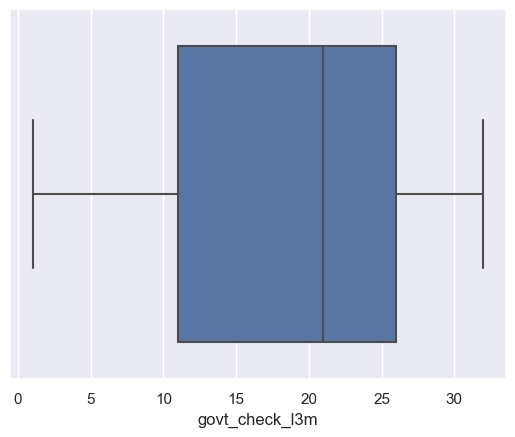

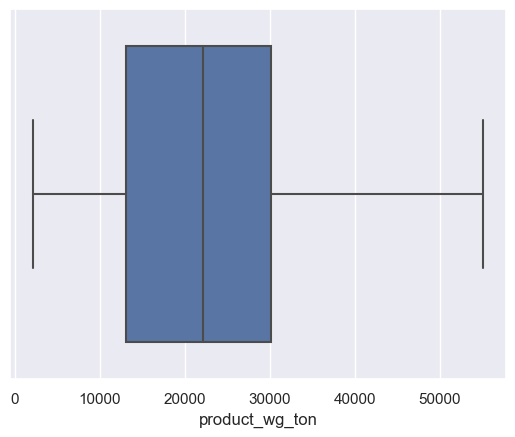

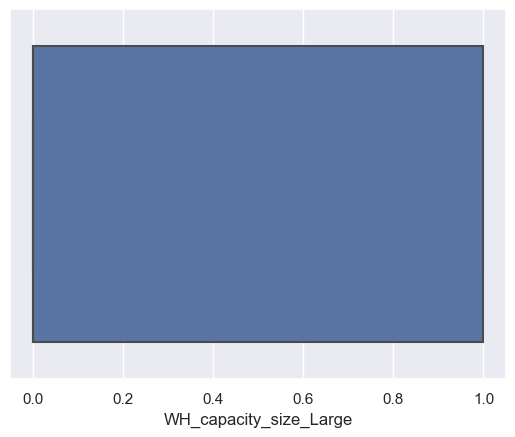

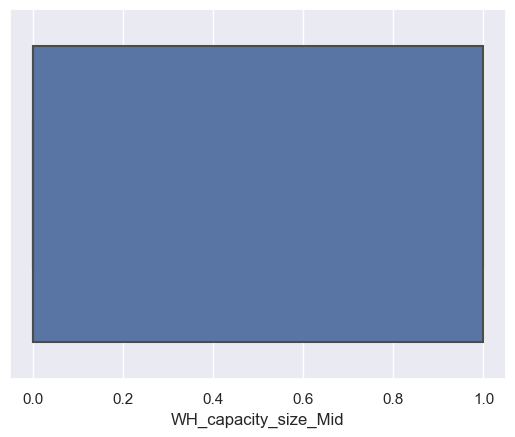

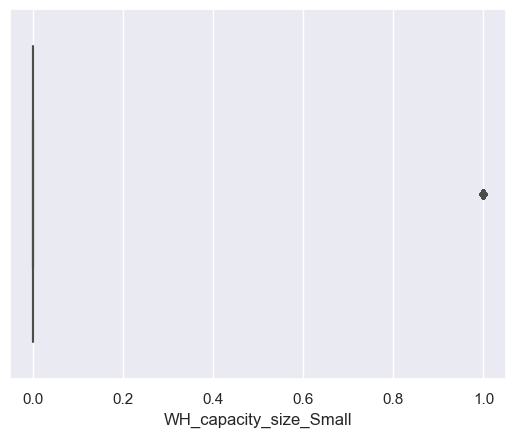

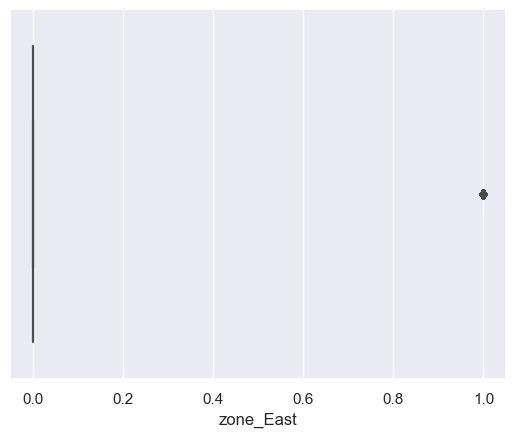

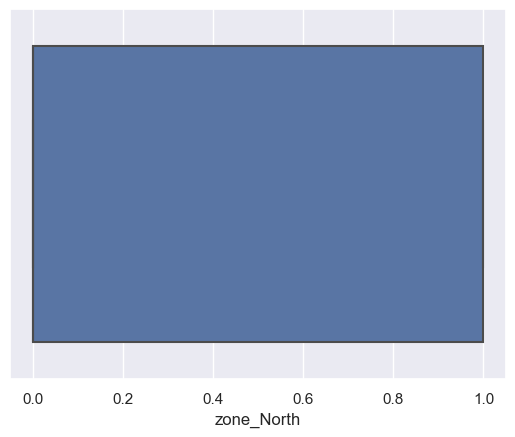

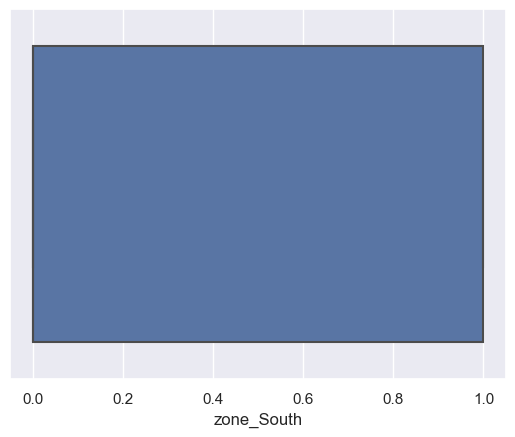

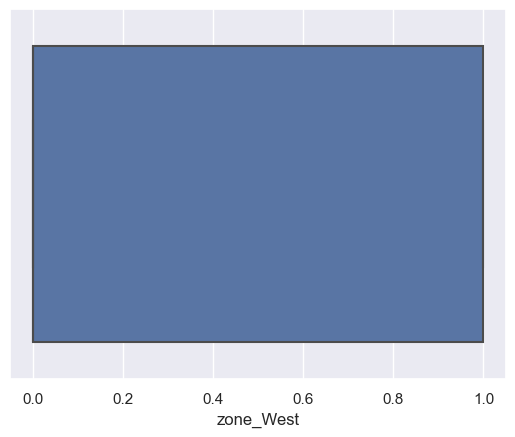

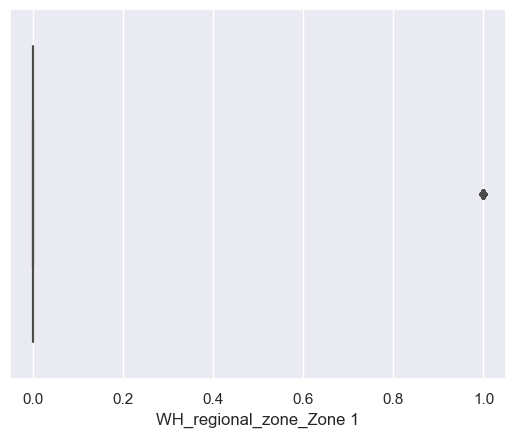

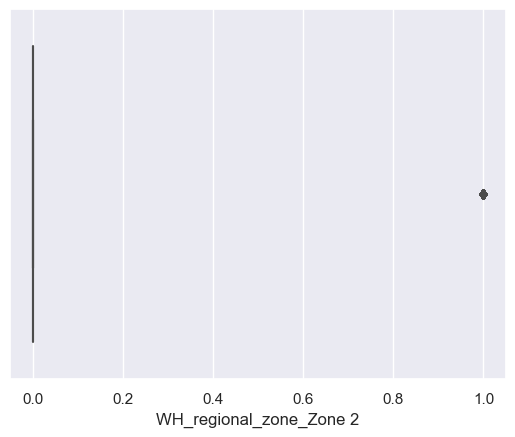

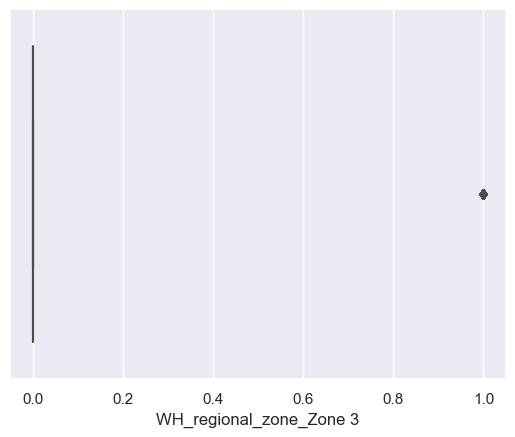

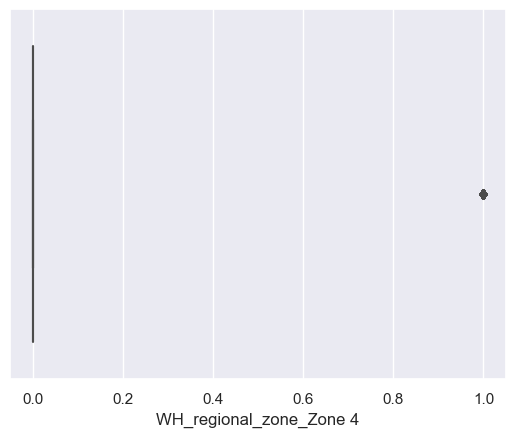

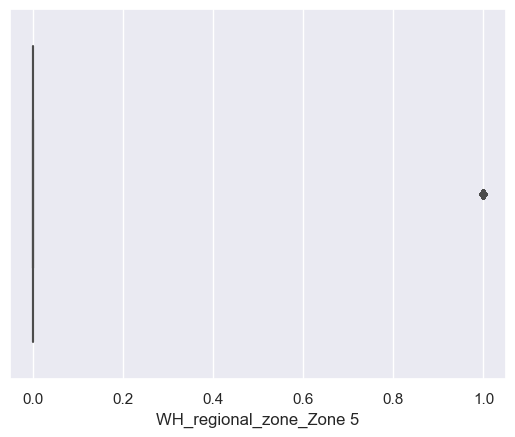

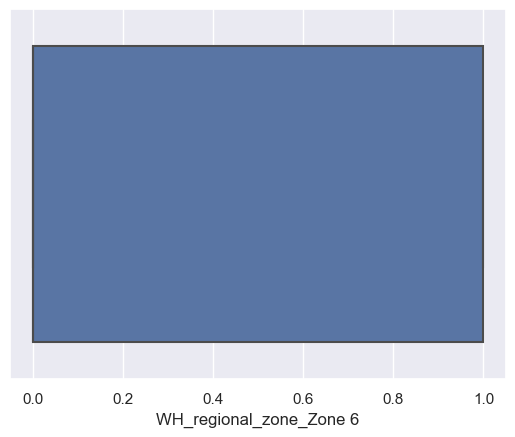

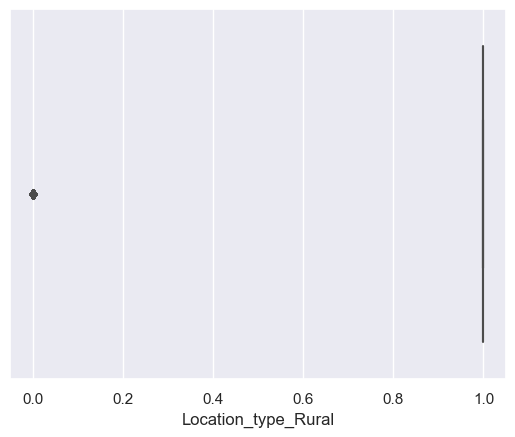

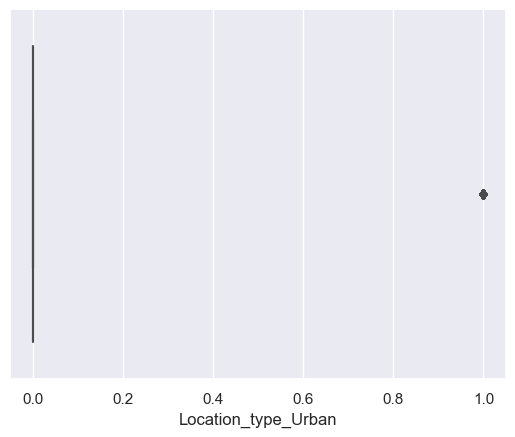

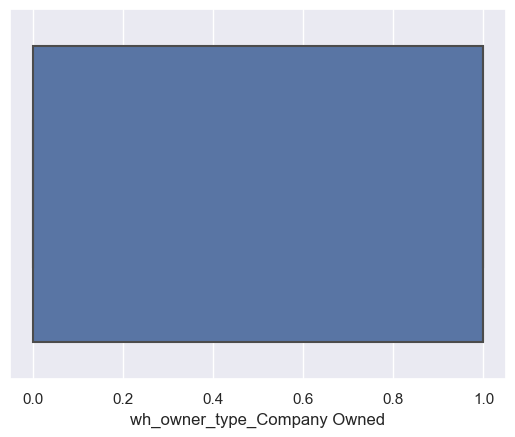

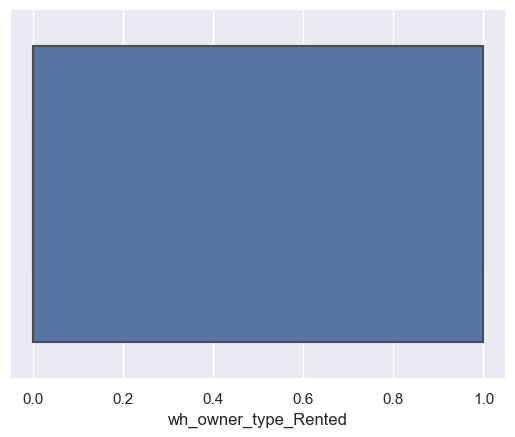

In [39]:
def boxplot(cols):
    sns.boxplot(df[cols])
    plt.show()
for i in list(df.select_dtypes(exclude=['object']).columns)[1:]:
    boxplot(i)

In [40]:
percentile25 = df['Competitor_in_mkt'].quantile(0.25)
percentile75 = df['Competitor_in_mkt'].quantile(0.75)
iqr = percentile75 - percentile25
iqr 

2.0

In [41]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [42]:
df['Competitor_in_mkt'] = np.where(
    df['Competitor_in_mkt'] > upper_limit,
    upper_limit,
    np.where(
        df['Competitor_in_mkt'] < lower_limit,
        lower_limit,
        df['Competitor_in_mkt']
    )
)

<AxesSubplot:xlabel='Competitor_in_mkt'>

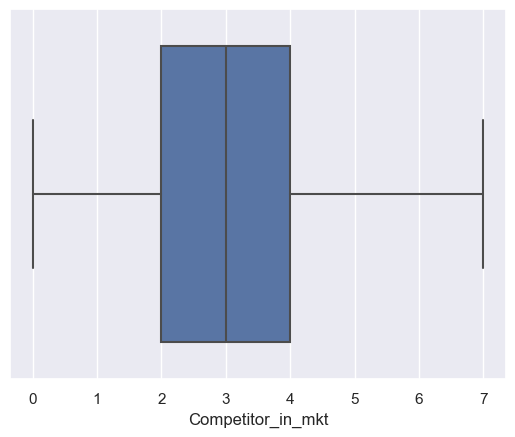

In [43]:
sns.boxplot(df['Competitor_in_mkt'])

In [44]:
percent25 = df['retail_shop_num'].quantile(0.25)
percent75 = df['retail_shop_num'].quantile(0.75)
iqr = percent75 - percent25
iqr 

1187.0

In [45]:
upper_limit = percent75 + 1.5*iqr
lower_limit = percent25 - 1.5*iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 7280.5
Lower limit 2532.5


In [46]:
df['retail_shop_num'] = np.where(
    df['retail_shop_num'] > upper_limit,
    upper_limit,
    np.where(
        df['retail_shop_num'] < lower_limit,
        lower_limit,
        df['retail_shop_num']
    )
)

<AxesSubplot:xlabel='retail_shop_num'>

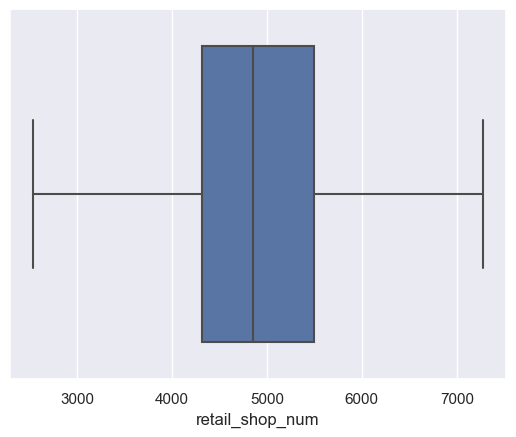

In [47]:
sns.boxplot(df['retail_shop_num'])

<AxesSubplot:xlabel='transport_issue_l1y'>

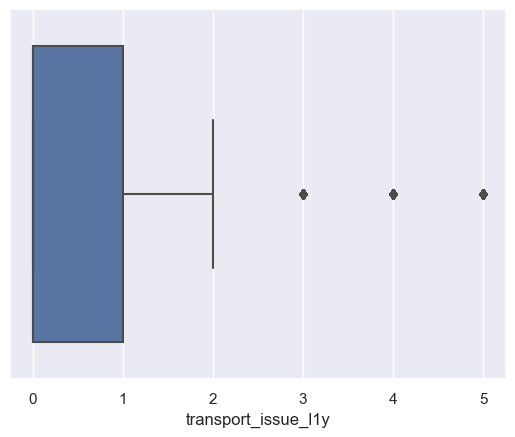

In [48]:
sns.boxplot(df['transport_issue_l1y'])

In [49]:
p25 = df['transport_issue_l1y'].quantile(0.25)
p75 = df['transport_issue_l1y'].quantile(0.75)
iqr = p75 - p25
iqr 

1.0

In [50]:
upper_limit = p75 + 1.5*iqr
lower_limit = p25 - 1.5*iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 2.5
Lower limit -1.5


In [51]:
df['transport_issue_l1y'] = np.where(
    df['transport_issue_l1y'] > upper_limit,
    upper_limit,
    np.where(
        df['transport_issue_l1y'] < lower_limit,
        lower_limit,
        df['transport_issue_l1y']
    )
)

<AxesSubplot:xlabel='transport_issue_l1y'>

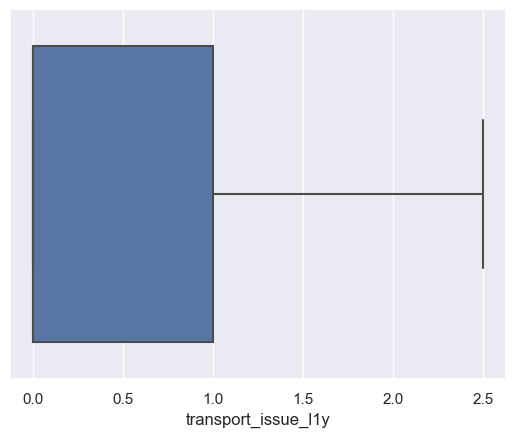

In [52]:
sns.boxplot(df['transport_issue_l1y'])

<AxesSubplot:xlabel='workers_num'>

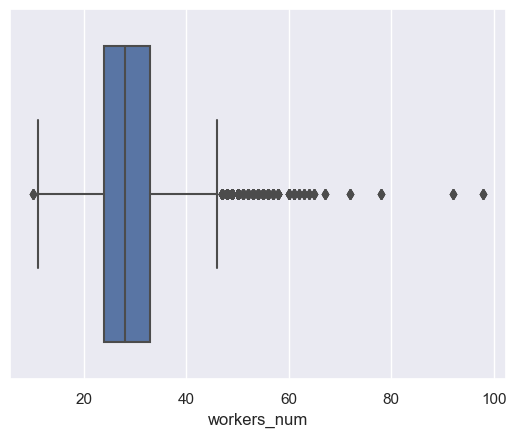

In [53]:
sns.boxplot(df['workers_num'])

In [54]:
P25 = df['workers_num'].quantile(0.25)
P75 = df['workers_num'].quantile(0.75)
iqr = P75 - P25
iqr

9.0

In [55]:
upper_limit = P75 + 1.5*iqr
lower_limit = P25 - 1.5*iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 46.5
Lower limit 10.5


In [56]:
df['workers_num'] = np.where(
    df['workers_num'] > upper_limit,
    upper_limit,
    np.where(
        df['workers_num'] < lower_limit,
        lower_limit,
        df['workers_num']
    )
)

<AxesSubplot:xlabel='workers_num', ylabel='Density'>

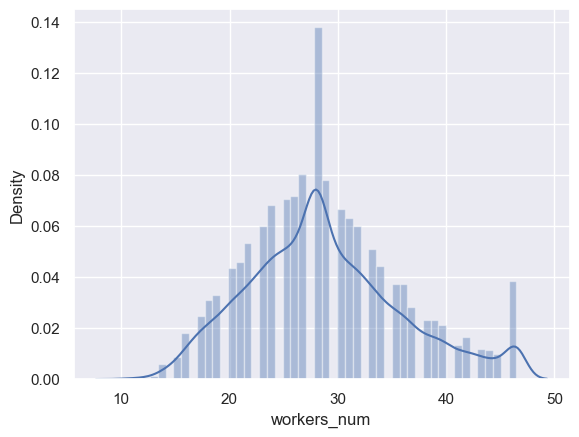

In [57]:
sns.distplot(df['workers_num'])

In [59]:
from sklearn.model_selection import train_test_split

X = df.drop(['product_wg_ton'], axis = 1)
Y = df['product_wg_ton']

X_train, X_test, Y_train , Y_test = train_test_split(X,Y,train_size = 0.7 , test_size = 0.3, random_state = 0)

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [63]:
# RandomForest Regression 
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
print("R2_Score :", r2_score(Y_test, y_pred_rf))
print("*****************************")
print("MAE :", mean_absolute_error(Y_test, y_pred_rf))
print("*****************************")
print("MAPE :", mean_absolute_percentage_error(Y_test, y_pred_rf))

R2_Score : 0.985264957636507
*****************************
MAE : 1097.1585426666668
*****************************
MAPE : 0.06008794818101904


In [64]:
score=r2_score(Y_test,y_pred_rf)
print(score*100)

98.5264957636507


In [65]:
diff=1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print(diff*100)

98.520379182059


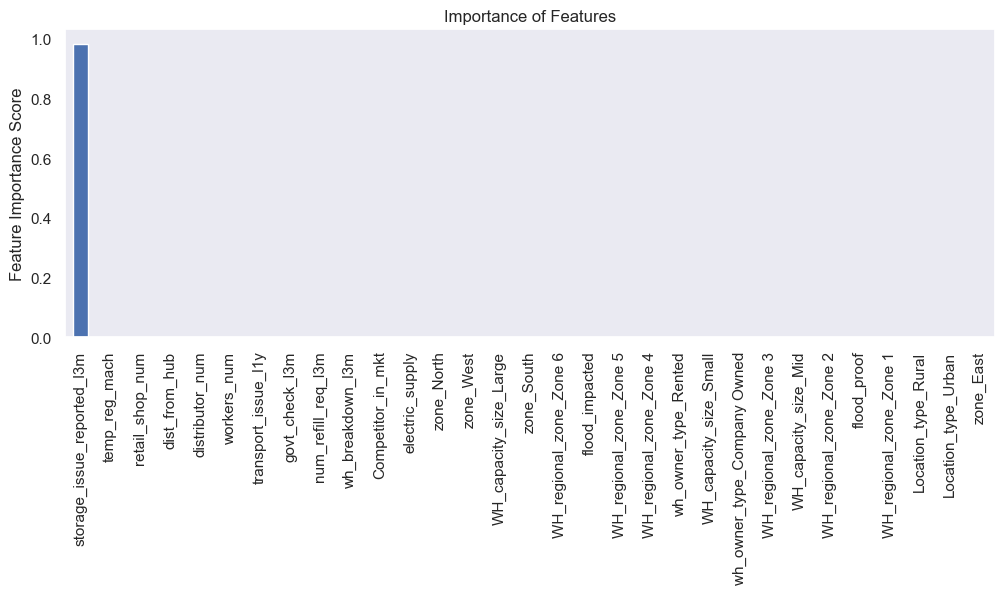

In [66]:
#important features
feat_imp = pd.Series(rf.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 4))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [72]:
from sklearn.linear_model import Ridge, Lasso

In [73]:
#  Ridge
ridge = Ridge(alpha=10)
ridge.fit(X_train, Y_train)
y_pred_ridge = ridge.predict(X_test)
print("R2_Score :", r2_score(Y_test, y_pred_ridge))
print("*****************************")
print("MAE :", mean_absolute_error(Y_test, y_pred_ridge))
print("*****************************")
print("MAPE :", mean_absolute_percentage_error(Y_test, y_pred_ridge))

R2_Score : 0.9781067561978034
*****************************
MAE : 1276.81623051611
*****************************
MAPE : 0.08358619784939614


In [74]:
#  Lasso
Lasso = Lasso(alpha=0.01)
Lasso.fit(X_train, Y_train)
y_pred_Lasso = Lasso.predict(X_test)
print("R2_Score :", r2_score(Y_test, y_pred_Lasso))
print("*****************************")
print("MAE :", mean_absolute_error(Y_test, y_pred_Lasso))
print("*****************************")
print("MAPE :", mean_absolute_percentage_error(Y_test, y_pred_Lasso))

R2_Score : 0.9781225849290618
*****************************
MAE : 1276.1963144300844
*****************************
MAPE : 0.08356238071184764


In [75]:
from sklearn.tree import DecisionTreeRegressor
Dt= DecisionTreeRegressor()
Dt.fit(X_train ,Y_train)
y_pred_Dt = Dt.predict(X_test)
print("R2_Score :", r2_score(Y_test, y_pred_Dt))
print("*****************************")
print("MAE :", mean_absolute_error(Y_test, y_pred_Dt))
print("*****************************")
print("MAPE :", mean_absolute_percentage_error(Y_test, y_pred_Dt))

R2_Score : 0.9725940720969427
*****************************
MAE : 1407.9493333333332
*****************************
MAPE : 0.07578535489614535
